In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as cn

# Set Plot Style
plt.style.use('seaborn-paper')

In [106]:
# Calculate the weighting transfer functions for SSV analysis
# Taken from Multivariable PID control by Decoupling
# Uncertainty frequency range
# For Woodberry:
# T_Max = 21.0 -> 1/21.0 
# For Rosenbrock
# T_Max = 1. -> 1/1

# Test - Rosenbrock
tf = cn.tf([1.],[1., 1])

# Uncertainty limits 
u_min = 0.1 # 10 % Uncertainty for small freq
u_max = 3.0 # 300 % Uncertainty for high freq
T_u = .1*1. # Uncertainty Freq T_u = T_Max, Assuming a rise over 1 dec
# Internal weighting function -> Model error, see Skogestad and Postelethwait, p.302 and p.269
WI = cn.tf([T_u,u_min],[T_u/u_max, 1])

# Make a bode plot
omega = np.logspace(-5,4,1e5)
magI, phaseI, omega = cn.bode(WI,omega, Plot = False)
magT, phaseT, omega = cn.bode(tf,omega,Plot=False)
WI


 0.1 s + 0.1
-------------
0.03333 s + 1

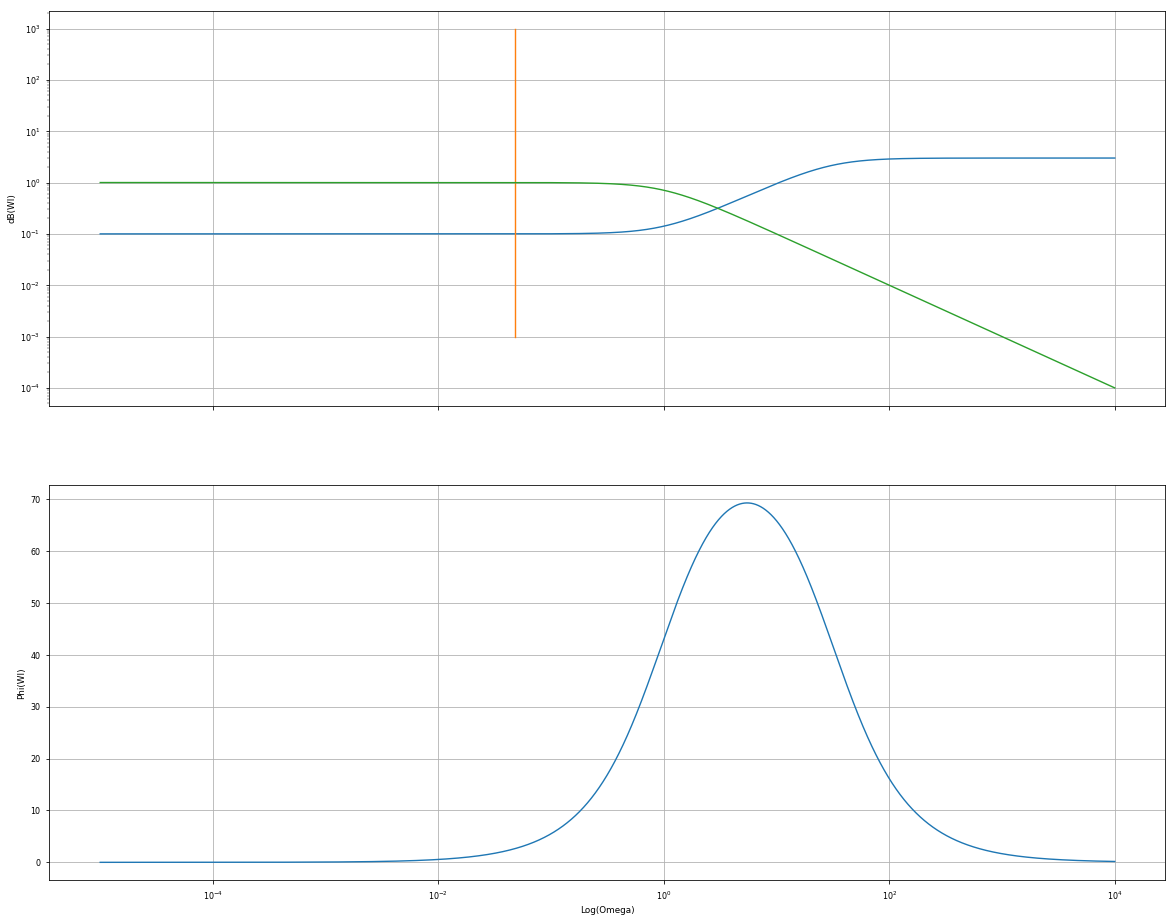

In [107]:
# Make a plot of the stability weight

plt.clf()
fig, ax = plt.subplots(2,1,sharex = True, figsize = (20,16))
# Magnitude
ax[0].loglog(omega,magI)
ax[0].loglog([omega_u,omega_u],[1e-3,1e3])
ax[0].loglog(omega,magT)
# Phase
ax[1].semilogx(omega,phaseI)
# Layout
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel("dB(WI)")
ax[1].set_ylabel("Phi(WI)")
ax[1].set_xlabel("Log(Omega)")
plt.show()


0.1 s + 1.5
-----------
  10 s + 1



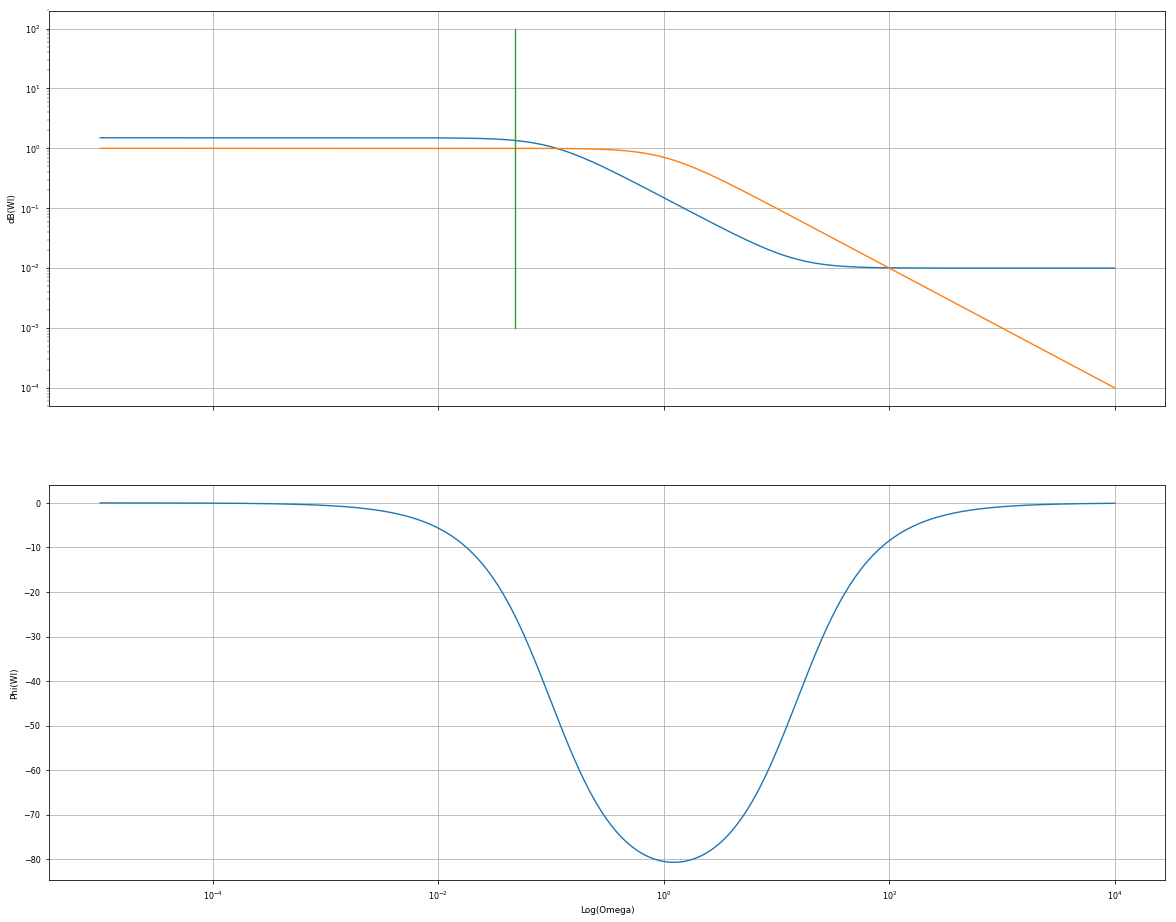

In [109]:
# Performance limits
p_ss = 1.5 # 150% for steady state
p_hf = 0.01 # 1 % for high frequency
# Output weighting function -> Performance
WP = cn.tf([T_u, p_ss],[T_u/p_hf,1])
print(WP)
# Bode Plot Data
magP, phaseP, omega = cn.bode(WP,omega, Plot = False)

# Make a plot of the stability weight

plt.clf()
fig, ax = plt.subplots(2,1,sharex = True, figsize = (20,16))
# Magnitude
ax[0].loglog(omega,magP)
ax[0].loglog(omega,magT)
ax[0].loglog([omega_u,omega_u],[1e-3,1e2])
# Phase
ax[1].semilogx(omega,phaseP)
# Layout
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel("dB(WI)")
ax[1].set_ylabel("Phi(WI)")
ax[1].set_xlabel("Log(Omega)")
plt.show()